Initial PE: 614977325.4648108
Optimization terminated successfully.
         Current function value: -287.645913
         Iterations: 947
         Function evaluations: 986
         Gradient evaluations: 986
Optimized PE: -287.64591315780893
 Step  PotEng   KinEng   TotEng   Temp 
    0 -287.646   90.666 -196.980 0.907
   10 -232.976   69.354 -163.623 0.694
   20 -217.459   80.933 -136.526 0.809
   30 -221.090   96.596 -124.495 0.966
   40 -227.232  102.522 -124.710 1.025
   50 -214.876   95.156 -119.719 0.952
   60 -215.561   99.233 -116.329 0.992
   70 -205.795   94.512 -111.283 0.945
   80 -198.448   93.420 -105.028 0.934
   90 -191.094   92.939  -98.155 0.929
  100 -183.238   93.452  -89.786 0.935
  110 -172.614   90.737  -81.878 0.907
  120 -169.922   94.524  -75.398 0.945
  130 -166.463   97.042  -69.421 0.970
  140 -159.272   94.929  -64.344 0.949
  150 -153.561   95.307  -58.254 0.953
  160 -149.101   95.822  -53.279 0.958
  170 -148.180   97.683  -50.497 0.977
  180 -139.275  

 2110 -112.548   96.334  -16.214 0.963
 2120 -115.578   98.689  -16.889 0.987
 2130 -114.074   97.476  -16.598 0.975
 2140 -121.890  103.716  -18.173 1.037
 2150 -123.916  102.576  -21.340 1.026
 2160 -120.327  100.348  -19.979 1.003
 2170 -115.904   99.025  -16.879 0.990
 2180 -125.980  104.454  -21.526 1.045
 2190 -122.115  101.687  -20.428 1.017
 2200 -123.707  101.890  -21.817 1.019
 2210 -118.512   95.597  -22.916 0.956
 2220 -127.459  103.210  -24.249 1.032
 2230 -114.222   93.065  -21.157 0.931
 2240 -125.019  101.381  -23.638 1.014
 2250 -118.694   97.796  -20.898 0.978
 2260 -127.704  107.492  -20.211 1.075
 2270 -130.345  105.630  -24.716 1.056
 2280 -124.597   98.086  -26.511 0.981
 2290 -125.705   99.598  -26.106 0.996
 2300 -131.046  100.355  -30.691 1.004
 2310 -130.603  101.234  -29.369 1.012
 2320 -134.460  103.887  -30.574 1.039
 2330 -123.676   96.547  -27.129 0.965
 2340 -125.541   99.806  -25.735 0.998
 2350 -117.280   93.104  -24.176 0.931
 2360 -119.572   98.561  

 4340 -118.162   96.145  -22.017 0.961
 4350 -118.378  100.254  -18.124 1.003
 4360 -116.011  100.000  -16.011 1.000
 4370 -118.098   99.295  -18.803 0.993
 4380 -124.276  104.427  -19.848 1.044
 4390 -116.767   96.559  -20.208 0.966
 4400 -122.003  101.598  -20.405 1.016
 4410 -117.673   97.929  -19.744 0.979
 4420 -123.314  101.074  -22.240 1.011
 4430 -119.859   98.949  -20.910 0.989
 4440 -124.293  104.400  -19.893 1.044
 4450 -129.391  105.614  -23.777 1.056
 4460 -124.267   99.783  -24.484 0.998
 4470 -125.713   99.516  -26.198 0.995
 4480 -122.954   98.348  -24.606 0.983
 4490 -123.690   98.035  -25.655 0.980
 4500 -129.175  101.270  -27.904 1.013
 4510 -127.420   99.950  -27.470 1.000
 4520 -126.524   98.556  -27.968 0.986
 4530 -121.746   96.235  -25.511 0.962
 4540 -119.858   98.204  -21.655 0.982
 4550 -126.031  102.057  -23.974 1.021
 4560 -125.361  100.258  -25.104 1.003
 4570 -123.959   98.417  -25.542 0.984
 4580 -127.127  101.958  -25.168 1.020
 4590 -125.238  100.856  

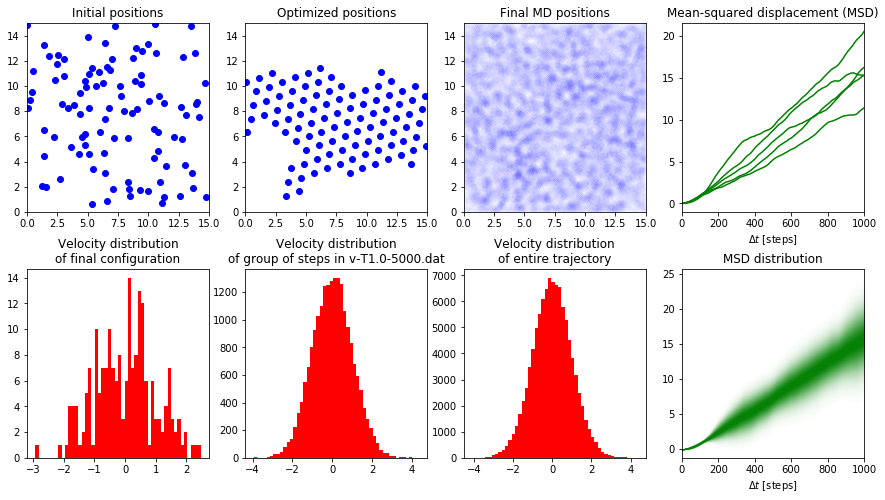

In [1]:
#!/usr/bin/env python
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
import scipy.optimize as optim

#Simulation parameters:
L = 15.        #Simulation box size in reduced LJ units
N = 100        #Number of particles in box
T = 1.0        #Temperature in reduced LJ units
nSteps = 5000  #Total number of time steps in simulation

#Data collection parameters:
collectInterval = 10  #Output velocities and print energies every so-many steps
outputIntervalV = 1000 #Output velocity files every so-many steps (of data collected at collectInterval)
outputIntervalD = 1000 #Output mean-squared displacement vs time based on blocks of so-many steps


class MD:
    """
    Class that performs simple MD with LJ potentials.
    Note that the class itself supports much more general functionality,
    including simulation in 3 or higher dimensions, than what we use for this course.
    """
    
    def __init__(self, L):
        """
        Initialize simulation for d-dimensional box of length L (LJ units).
        Note d is set by the pos passed in various functions below.
        """
        self.L = L
    
    def pairPotential(self, pos):
        """
        Return potential energy and force on all atoms (Nxd array) given positions, pos (Nxd array).
        Potential is LJ with epsilon = sigma = 1 with minimum-image convention (effective cutoff ~ L/2).
        """
        x = (1./self.L)*(pos[None,...] - pos[:,None,:]) #NxNxd array of fractional relative positions
        x = self.L*(x-np.floor(0.5+x)) #apply minimum-image convention and convert back to Cartesian
        rInv2 = 1./squareform(np.sum(x**2, axis=-1)) #pairwise inverse squared distance
        rInv6 = rInv2**3 #squareform above makes these N*(N-1)/2 vector instead of NxN
        rInv12 = rInv6**2
        pe = 4.*np.sum(rInv12 - rInv6) #total potential energy (scalar)
        forces = 24.*np.sum(squareform((rInv6 -2.*rInv12)*rInv2)[...,None] * x, axis=1) #forces on each particle (Nxd)
        return pe, forces  #second squareform above restores to NxN
    
    def minimize(self, pos):
        """Minimize potential energy starting from pos."""
        def residual(x, md, d):
            pe, forces = md.pairPotential(x.reshape(-1,d))
            return pe, -forces.flatten() #Note gradient(pe) = -forces
        res = optim.minimize(residual, pos.flatten(), args=(self,pos.shape[1]), jac=True, options={'disp':True})
        peOpt = res.fun #optimized potential energy
        posOpt = res.x.reshape(pos.shape)
        return peOpt, posOpt
    
    """Create initial velocity distribution at specified temperature (LJ units)."""
    def initialVelocities(self, pos, T):
        v = np.random.standard_normal(pos.shape) * np.sqrt(T) #kB = m = 1
        v -= np.mean(v, axis=0)[None,:] #remove c.o.m velocity
        return v
    
    def run(self, pos, vel, dt, nSteps, collectInterval, T0=None, tDampT=1.):
        """
        Run molecular dynamics simulation:
        NVE simulation by default.
        Set T0 and tDampT for NVT with Berendsen thermostat.
        Return positions and velocities collected every collectInterval steps.
        """
        posAll = []
        velAll = []
        #Compute initial energy and forces:
        pe, forces = self.pairPotential(pos)
        ke = 0.5*np.sum(vel**2)
        print(' {:5s} {:8s} {:8s} {:8s} {:5s}'.format('Step', 'PotEng', 'KinEng', 'TotEng', 'Temp'))
        for iStep in range(nSteps+1):
            #Data collection and reporting:
            if(iStep % collectInterval == 0):
                posAll.append(pos.copy())
                velAll.append(vel.copy())
                print('{:5d} {:8.3f} {:8.3f} {:8.3f} {:5.3f}'.format(iStep, pe, ke, pe+ke, 2.*ke/pos.size))
            #Velocity verlet step:
            vel += (0.5*dt)*forces #velocity update first half
            pos += dt*vel #position update (note m=1)
            pe, forces = self.pairPotential(pos) #force update
            vel += (0.5*dt)*forces #velocity update second half
            ke = 0.5*np.sum(vel**2)
            #Thermostat:
            if(T0):
                keScale = 1. + (0.5*T0*pos.size/ke - 1.) * dt/tDampT
                vel *= np.sqrt(keScale)
                ke *= keScale
        return np.array(posAll), np.array(velAll)


#Test optimization of some particles in a 2D box
md = MD(L)
np.random.seed(123) #to make it reproducible below
pos0 = np.random.rand(N, 2)*L
print('Initial PE:', md.pairPotential(pos0)[0])

peOpt, posOpt = md.minimize(pos0)
print('Optimized PE:', peOpt)

#Run MD simulation starting from above:

#Make sure nSteps, output(V), output(D) and collect intervals are sequential multiples:
outputIntervalV = (outputIntervalV//collectInterval)*collectInterval
outputIntervalD = (outputIntervalD//outputIntervalV)*outputIntervalV
nSteps = (nSteps//outputIntervalD)*outputIntervalD

vel = md.initialVelocities(posOpt, T)
posAll, velAll = md.run(posOpt.copy(), vel, 0.01, nSteps, collectInterval, T0=T, tDampT=0.1) #, T0=None

#Save velocities (grouped by outputInterval) to text file:
velGrouped = velAll[1:].reshape(nSteps//outputIntervalV, (outputIntervalV//collectInterval)*posOpt.shape[0], posOpt.shape[1])
for iOut,vel in enumerate(velGrouped):
    fname = 'v-T{:.1f}-{:04d}.dat'.format(T, (iOut+1)*outputIntervalV)
    np.savetxt(fname, vel)

#Compute and save mean-squared displacements:
outDstride = outputIntervalD//collectInterval #number of data points in each block
tOutD = np.arange(outDstride+1)*collectInterval #time steps for MSD data
msdArr = []
for iOut in range(nSteps//outputIntervalD):
	dpos = posAll[outDstride*iOut:outDstride*(iOut+1)+1] - posAll[outDstride*iOut,None]
	msd = np.mean(np.sum(dpos**2, axis=-1), axis=-1)
	msdArr.append(msd)
	fnameD = 'msd-T{:.1f}-{:04d}.dat'.format(T, (iOut+1)*outputIntervalD)
	np.savetxt(fnameD, np.array([tOutD, msd]).T)
msdArr = np.array(msdArr).T

#Plot configurations:
fig, ax = plt.subplots(2,4, figsize=(15,8))
plt.subplots_adjust(hspace=0.3)
labels = ['Initial positions', 'Optimized positions', 'Final MD positions']
alphaArr = [ 1., 1., 1./len(posAll) ]
for iData, data in enumerate([pos0, posOpt, posAll.reshape(-1,posAll.shape[-1])]):
    plt.sca(ax[0,iData])
    plt.scatter(data[:,0]%L, data[:,1]%L, color='b', alpha=alphaArr[iData])
    plt.xlim(0, L)
    plt.ylim(0, L)
    plt.title(labels[iData])

#Plot velocity distributions:
#fig, ax = plt.subplots(1,3, figsize=(10,3))
labels = [
	'Velocity distribution\nof final configuration',
	'Velocity distribution\nof group of steps in '+fname,
	'Velocity distribution\nof entire trajectory' ]
for iData, data in enumerate([velAll[-1], velGrouped[-1], velAll]):
    plt.sca(ax[1,iData])
    plt.hist(data.flatten(), bins=50, color='r')
    plt.title(labels[iData])

#Plot MSD:
plt.sca(ax[0,3])
plt.plot(tOutD, msdArr, 'g')
plt.title('Mean-squared displacement (MSD)')
plt.xlabel(r'$\Delta t$ [steps]')
plt.xlim(0, tOutD[-1])

#Plot MSD distribution:
plt.sca(ax[1,3])
msdMean = np.mean(msdArr, axis=1)
msdStd = np.std(msdArr, axis=1)
for nSigma in np.arange(3.,0.1,-0.1):
	gaussVal = np.exp(-0.5*nSigma**2)
	color = np.ones(3)*(1-gaussVal) + np.array([0,0.5,0])*gaussVal
	plt.fill_between(tOutD, msdMean-nSigma*msdStd, msdMean+nSigma*msdStd, color=color)
plt.title('MSD distribution')
plt.xlabel(r'$\Delta t$ [steps]')
plt.xlim(0, tOutD[-1])

plt.savefig('MD-{:.1f}.png'.format(T), bbox_inches='tight')
plt.show()
